Generation of Supplementary figure 6, showing that a standard deviation of mutational effects of 0.025 is the most consistent with the empirical divergence patterns.

In [1]:
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 600
import seaborn as sns
from matplotlib import ticker

In [2]:
# Mounting my google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The summary statistics (including the KS statistics which will be used) are first imnported, both for the N=10^6 and N=10^5 scenarios 

In [3]:
dist_comps_1e6 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/Summ_stats_dists/Dist_stats_all_Mut_SD_WGD.csv')
dist_comps_1e5 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/Summ_stats_dists/Dist_stats_all_Mut_SD_WGD_1e5.csv')

In both cases, only the relevant values are kept:

In [4]:
KS_comps_1e6 = dist_comps_1e6[(dist_comps_1e6['Comparison'] == 'WGD') & (dist_comps_1e6['Property'] != 'Divergence ratio') & (dist_comps_1e6['Type'] == 'All')].copy().reset_index(drop=True)
KS_comps_1e5 = dist_comps_1e5[(dist_comps_1e5['Comparison'] == 'WGD') & (dist_comps_1e5['Property'] != 'Divergence ratio') & (dist_comps_1e5['Type'] == 'All')].copy().reset_index(drop=True)

Matrices are prepared for the mixed (economy-precision) and minimal models

In [5]:
# Dictionary of mutational target size ratios
run_ratio = {'0.5': '1/2', '1.0': '1', '2.0': '2', '3.0': '3', '4.0': '4', 
             '5.0': '5', '6.0': '6', '7.0': '7', '8.0': '8', '9.0': '9', 
             '10.0': '10'}

In [6]:
KS_comps_1e6 = KS_comps_1e6.astype({'Mut_ratio': 'string'})
KS_comps_1e5 = KS_comps_1e5.astype({'Mut_ratio': 'string'})

for row in range(KS_comps_1e6.shape[0]):
  KS_comps_1e6.at[row, 'Mut_ratio'] = run_ratio[KS_comps_1e6.at[row, 'Mut_ratio']]

for row in range(KS_comps_1e5.shape[0]):
  KS_comps_1e5.at[row, 'Mut_ratio'] = run_ratio[KS_comps_1e5.at[row, 'Mut_ratio']]

# Dropping all unused columns
KS_comps_1e6 = KS_comps_1e6[['Model', 'Mut_sigma', 'Mut_ratio', 'KS_stat']]
KS_comps_1e5 = KS_comps_1e5[['Model', 'Mut_sigma', 'Mut_ratio', 'KS_stat']]

# Computing the means and making distinct dataframes for the two models
means_1e6 = KS_comps_1e6.groupby(by=['Model', 'Mut_sigma', 'Mut_ratio'], as_index=False).mean()
means_1e5 = KS_comps_1e5.groupby(by=['Model', 'Mut_sigma', 'Mut_ratio'], as_index=False).mean()

mixed_1e6 = means_1e6[means_1e6['Model'] == 'Mixed'].copy().reset_index(drop=True)
min_1e6 = means_1e6[means_1e6['Model'] == 'Minimal'].copy().reset_index(drop=True)

mixed_1e5 = means_1e5[means_1e5['Model'] == 'Mixed'].copy().reset_index(drop=True)
min_1e5 = means_1e5[means_1e5['Model'] == 'Minimal'].copy().reset_index(drop=True)

In [7]:
# Making the four matrices
KS_min_1e6 = min_1e6.pivot(index='Mut_sigma', columns='Mut_ratio',
                           values='KS_stat')
KS_mixed_1e6 = mixed_1e6.pivot(index='Mut_sigma', columns='Mut_ratio',
                               values='KS_stat')

KS_min_1e5 = min_1e5.pivot(index='Mut_sigma', columns='Mut_ratio',
                           values='KS_stat')
KS_mixed_1e5 = mixed_1e5.pivot(index='Mut_sigma', columns='Mut_ratio',
                               values='KS_stat')

In [8]:
# For reordering the matrices
columns = ['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Reordering each matrix
KS_min_1e6 = KS_min_1e6.reindex(labels=columns, axis='columns')
KS_mixed_1e6 = KS_mixed_1e6.reindex(labels=columns, axis='columns')
KS_min_1e5 = KS_min_1e5.reindex(labels=columns, axis='columns')
KS_mixed_1e5 = KS_mixed_1e5.reindex(labels=columns, axis='columns')

The figure can then be constructed

In [9]:
# Mins and max for the color scales
min_KS = np.min((min_1e6['KS_stat'].min(), min_1e5['KS_stat'].min(),
                 mixed_1e6['KS_stat'].min(), mixed_1e5['KS_stat'].min()))
max_KS = np.max((min_1e6['KS_stat'].max(), min_1e5['KS_stat'].max(),
                 mixed_1e6['KS_stat'].max(), mixed_1e5['KS_stat'].max()))

<ipython-input-10-307ad8a555c3>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size=16)


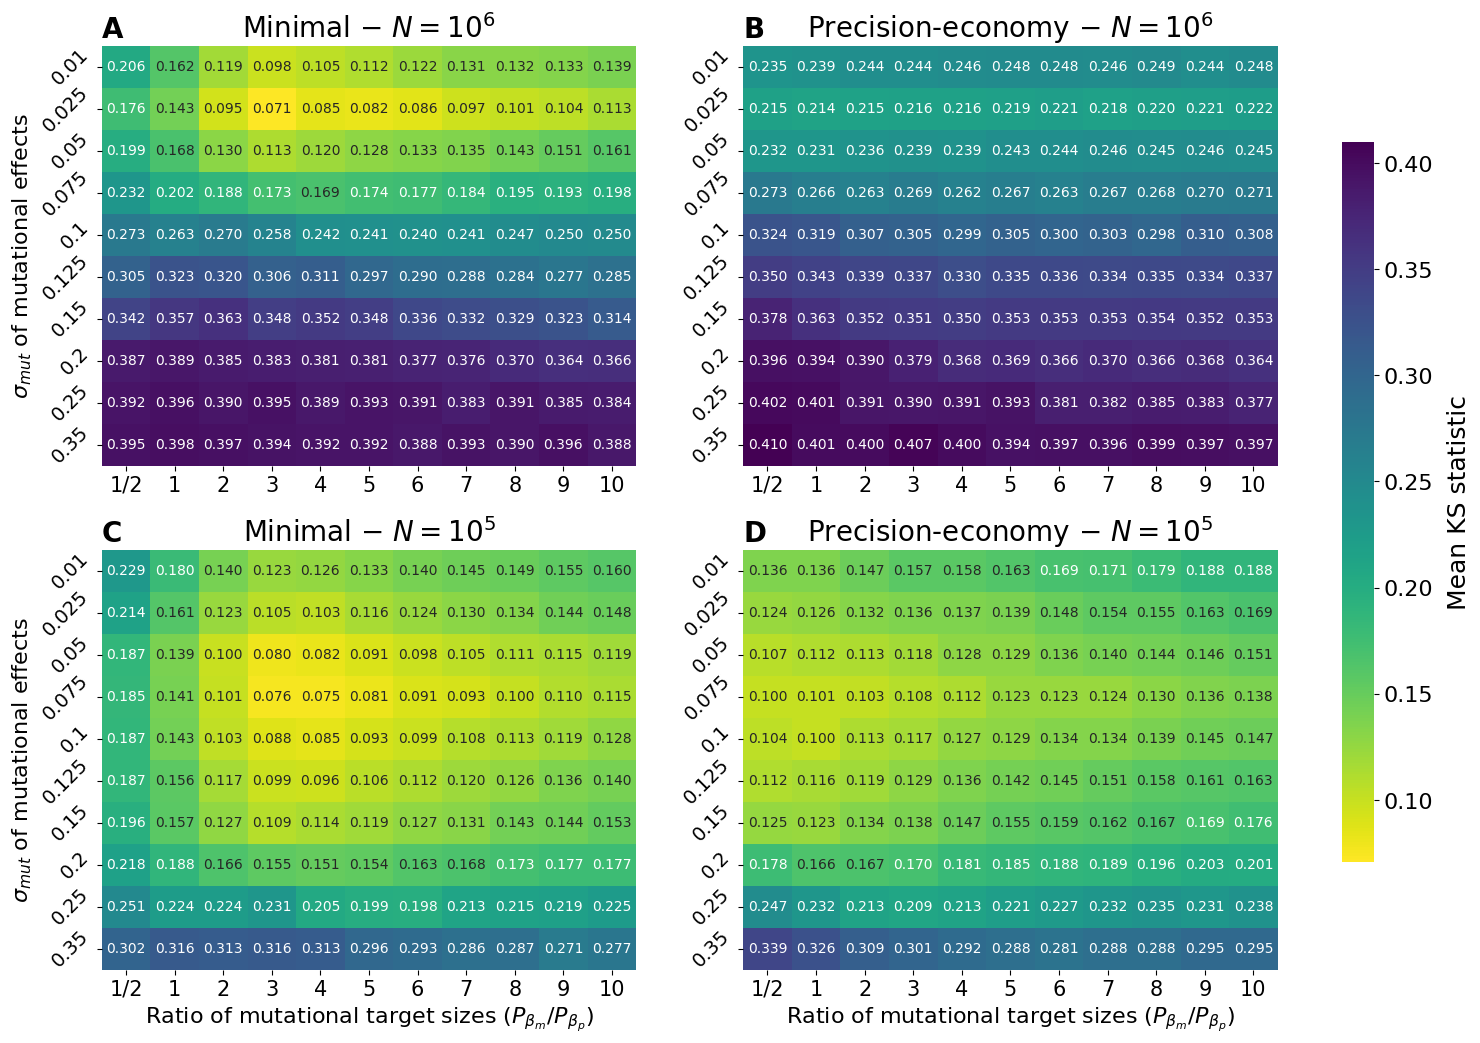

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

fig.subplots_adjust(right=0.86)
cbar_ax = fig.add_axes([0.9, 0.20, 0.02, 0.6])


# Minimal model
heat1 = sns.heatmap(KS_min_1e6, vmin=min_KS, vmax=max_KS, cmap='viridis_r', 
                    ax=axs[0,0], annot=True, fmt = '.3f', cbar_ax=cbar_ax)

heat2 = sns.heatmap(KS_min_1e5, vmin=min_KS, vmax=max_KS, cmap='viridis_r', 
                    ax=axs[1,0], annot=True, fmt = '.3f', cbar=False)

# Cost-precision model
heat3 = sns.heatmap(KS_mixed_1e6, vmin=min_KS, vmax=max_KS, cmap='viridis_r', 
                    ax=axs[0,1], annot=True, fmt = '.3f', cbar=False)

heat4 = sns.heatmap(KS_mixed_1e5, vmin=min_KS, vmax=max_KS, cmap='viridis_r', 
                    ax=axs[1,1], annot=True, fmt = '.3f', cbar=False)

# cbar labels
cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size=16)
cbar_ax.set_ylabel('Mean KS statistic', size=18, labelpad=10)

# Heatmaps axes
for ax in [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]:
  ax.set_xticklabels(ax.get_xmajorticklabels(), size=15)
  
  ax.set_yticklabels(ax.get_ymajorticklabels(), size=14, rotation=45)

# Axes labels
axs[0,0].set_ylabel(r"$\sigma_{mut}$ of mutational effects", fontsize=16)
axs[1,0].set_ylabel(r"$\sigma_{mut}$ of mutational effects", fontsize=16)
axs[0,1].set_ylabel('')
axs[1,1].set_ylabel('')

axs[0,0].set_xlabel('')
axs[0,1].set_xlabel('')

axs[1,0].set_xlabel(r"Ratio of mutational target sizes ($P_{\beta_m}$/$P_{\beta_p}$)", 
                    fontsize=16)
axs[1,1].set_xlabel(r"Ratio of mutational target sizes ($P_{\beta_m}$/$P_{\beta_p}$)", 
                    fontsize=16)

# Titles
axs[0,0].set_title(r"Minimal $-$ $N = 10^6$", fontsize=20)
axs[0,1].set_title(r"Precision-economy $-$ $N = 10^6$", fontsize=20)
axs[1,0].set_title(r"Minimal $-$ $N = 10^5$", fontsize=20)
axs[1,1].set_title(r"Precision-economy $-$ $N = 10^5$", fontsize=20)

# Figure annotations
axs[0,0].annotate('A', (0, 1.02), xycoords='axes fraction', 
                      fontsize=20, fontweight='bold')
axs[0,1].annotate('B', (0, 1.02), xycoords='axes fraction', 
                      fontsize=20, fontweight='bold')
axs[1,0].annotate('C', (0, 1.02), xycoords='axes fraction', 
                      fontsize=20, fontweight='bold')
axs[1,1].annotate('D', (0, 1.02), xycoords='axes fraction', 
                      fontsize=20, fontweight='bold')

FigS6 = plt.gcf()
FigS6.savefig('/content/drive/My Drive/Redaction_SA/Final_figures_v2/FigS6.tiff',
              bbox_inches='tight')